In [166]:
#import library
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
#set path where your dataset stored
path = './dataset/SupermartRetail.csv'

In [168]:
# create variable named data
# read and set dataset to variable named data
data = pd.read_csv(path)

In [169]:
# show top 10 data
data.head(10)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
5,OD6,Adavan,Food Grains,Organic Staples,Dharmapuri,06-09-2015,West,2305,0.26,322.70,Tamil Nadu
6,OD7,Jonas,Fruits & Veggies,Fresh Vegetables,Trichy,06-09-2015,West,826,0.33,346.92,Tamil Nadu
7,OD8,Hafiz,Fruits & Veggies,Fresh Fruits,Ramanadhapuram,06-09-2015,West,1847,0.32,147.76,Tamil Nadu
8,OD9,Hafiz,Bakery,Biscuits,Tirunelveli,06-09-2015,West,791,0.23,181.93,Tamil Nadu
9,OD10,Krithika,Bakery,Cakes,Chennai,06-09-2015,West,1795,0.27,484.65,Tamil Nadu


In [170]:
# show information related to dataset ( column name, data count, data type )
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [171]:
# show count of duplicated data
data.duplicated().sum()

0

In [172]:
# create dataframe to show missing value, type and count of unique value
null = data.isna().sum()
in_percent = (null/len(data))*100
tipe = data.dtypes
unik = data.nunique()

overview = pd.DataFrame({'missing':null,'in_percent':in_percent,'type':tipe,'unique':unik})

In [173]:
# show variable overview
overview

,missing,in_percent,type,unique
Order ID,0,0.0,object,9994
Customer Name,0,0.0,object,50
Category,0,0.0,object,7
Sub Category,0,0.0,object,23
City,0,0.0,object,24
Order Date,0,0.0,object,1236
Region,0,0.0,object,5
Sales,0,0.0,int64,1989
Discount,0,0.0,float64,26
Profit,0,0.0,float64,8380


In [174]:
# change type of Order Date from Object to datetime
# and create new column named YearMonth and get year and month only from Order Date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['YearMonth'] = data['Order Date'].dt.to_period('M')

In [175]:
# sum total sales per year month
penjualan_per_bulan = data.groupby('YearMonth')['Sales'].sum()

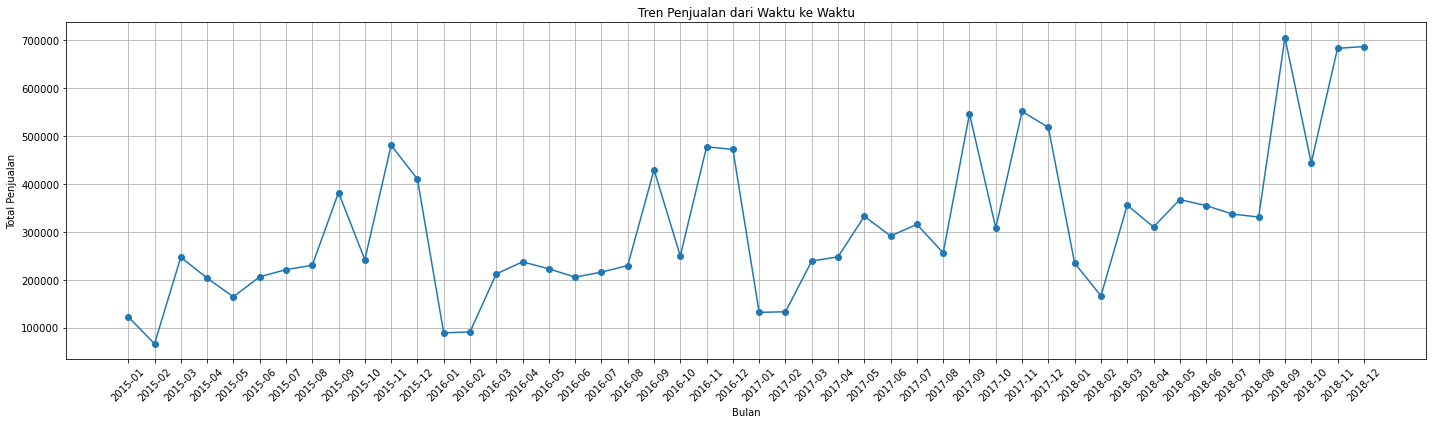

In [176]:
# create line chart to show total sales per year month
plt.figure(figsize=(20, 6))
plt.plot(penjualan_per_bulan.index.astype(str), penjualan_per_bulan.values, marker='o')
plt.title('Tren Penjualan dari Waktu ke Waktu')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [177]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,YearMonth
0,OD1,Harish,Oil & Masala,Masalas,Vellore,2017-11-08,North,1254,0.12,401.28,Tamil Nadu,2017-11
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,2017-11-08,South,749,0.18,149.80,Tamil Nadu,2017-11
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,2017-06-12,West,2360,0.21,165.20,Tamil Nadu,2017-06
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,2016-10-11,South,896,0.25,89.60,Tamil Nadu,2016-10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,2016-10-11,South,2355,0.26,918.45,Tamil Nadu,2016-10
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,2015-12-24,West,945,0.16,359.10,Tamil Nadu,2015-12
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,2015-07-12,West,1195,0.26,71.70,Tamil Nadu,2015-07
9991,OD9992,Ravi,Food Grains,Rice,Bodi,2017-06-06,West,1567,0.16,501.44,Tamil Nadu,2017-06
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,2018-10-16,West,1659,0.15,597.24,Tamil Nadu,2018-10


In [187]:
penjualan_per_kategori = data.groupby('Category').agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False).reset_index()
penjualan_per_kategori

,Category,Sales
0,"Eggs, Meat & Fish",2267401
1,Snacks,2237546
2,Food Grains,2115272
3,Bakery,2112281
4,Fruits & Veggies,2100727
5,Beverages,2085313
6,Oil & Masala,2038442


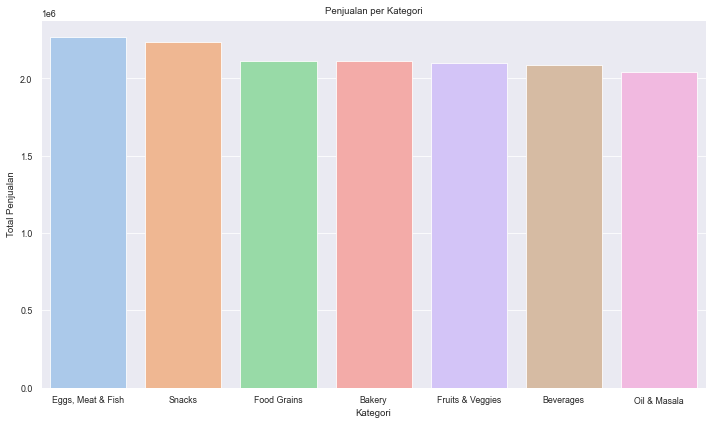

In [192]:
sns.set_theme(style='darkgrid')
sns.set_palette('pastel')
sns.set_context('paper')
plt.figure(figsize=(10, 6))
sns.barplot(data=penjualan_per_kategori, x='Category', y='Sales')
plt.title('Penjualan per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

In [188]:
# show total sales group by sub-category
penjualan_per_sub_kategori = data.groupby('Sub Category').agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False).reset_index()
penjualan_per_sub_kategori

,Sub Category,Sales
0,Health Drinks,1051439
1,Soft Drinks,1033874
2,Cookies,768213
3,Breads & Buns,742586
4,Noodles,735435
5,Chocolates,733898
6,Masalas,697480
7,Cakes,685612
8,Biscuits,684083
9,Spices,672876


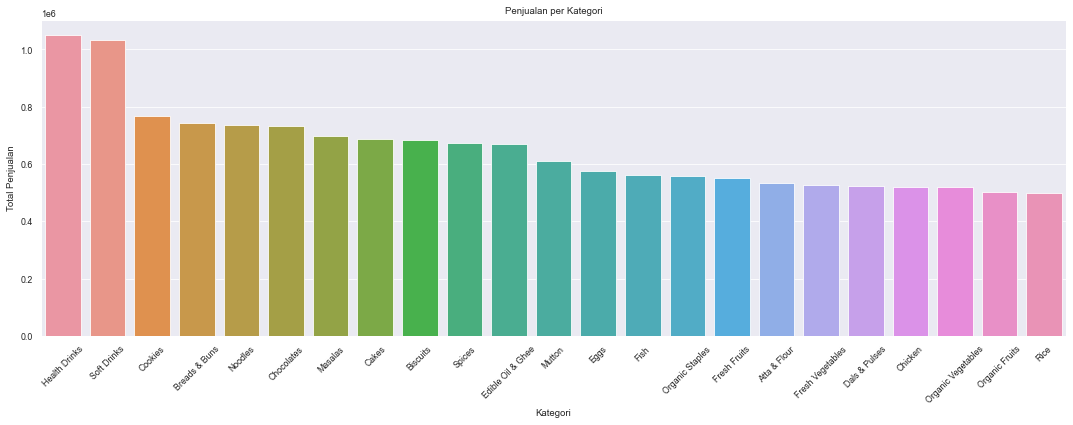

In [203]:
sns.set_theme(style='darkgrid')
sns.set_palette('pastel')
sns.set_context('paper')
plt.figure(figsize=(15, 6))
sns.barplot(x='Sub Category', y='Sales', data=penjualan_per_sub_kategori)
plt.title('Penjualan per Kategori')
plt.xlabel('Kategori')
plt.xticks(rotation=45)
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

In [204]:
profit_per_category = data.groupby('Category').agg({'Profit':'sum'}).sort_values(by='Profit',ascending=False).reset_index()
profit_per_category

,Category,Profit
0,Snacks,568178.85
1,"Eggs, Meat & Fish",567357.22
2,Fruits & Veggies,530400.38
3,Food Grains,529162.64
4,Bakery,528521.06
5,Beverages,525605.76
6,Oil & Masala,497895.29


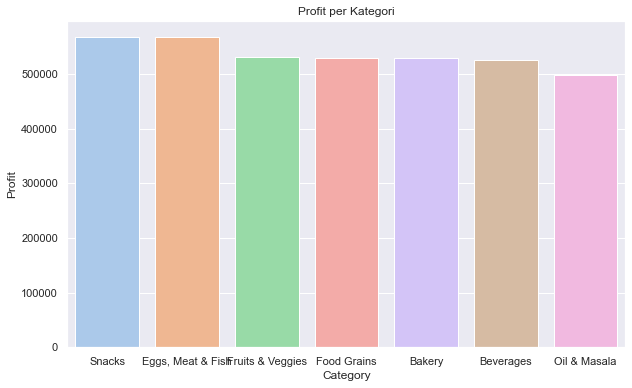

In [209]:
plt.figure(figsize=(10,6))
sns.set_theme(style='darkgrid')
sns.set_palette('pastel')
sns.barplot(data=profit_per_category,x='Category',y='Profit')
plt.title('Profit per Kategori')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.show()

In [212]:
profit_per_region = data.groupby('Region').agg({'Profit':'sum'}).sort_values(by='Profit',ascending=False).reset_index()
profit_per_region

,Region,Profit
0,West,1192004.61
1,East,1074345.58
2,Central,856806.84
3,South,623562.89
4,North,401.28


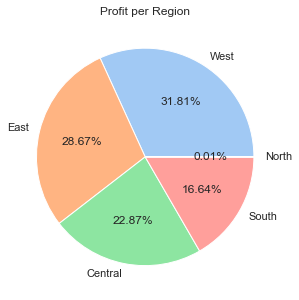

In [225]:
plt.figure(figsize=(8, 5))
sns.set_theme(style='darkgrid')
sns.set_palette('pastel')
plt.pie(profit_per_region['Profit'],labels=profit_per_region['Region'],autopct='%1.2f%%')
plt.title('Profit per Region')
plt.show()

In [228]:
sales_per_customer = data.groupby('Customer Name').agg({'Sales':'sum'}).sort_values(by='Sales',ascending=False).reset_index()
sales_per_customer

,Customer Name,Sales
0,Krithika,334361
1,Amrish,333351
2,Verma,331665
3,Arutra,325720
4,Vidya,321798
5,Vinne,319565
6,Shah,318588
7,Suresh,315973
8,Adavan,315341
9,Surya,312645


In [232]:
top_5_customer = sales_per_customer.iloc[0:5]
top_5_customer

,Customer Name,Sales
0,Krithika,334361
1,Amrish,333351
2,Verma,331665
3,Arutra,325720
4,Vidya,321798


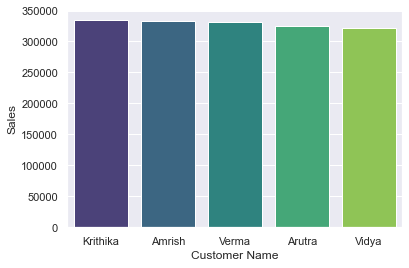

In [233]:
sns.barplot(data=top_5_customer, x='Customer Name',y='Sales',palette='viridis')
plt.show()